# Homework A

476686 Umair Aziz</br>
477001 Ondřej Marvan</br>
475852 Ashutosh</br>
474064 Phuong Chi Dao </br>

We want to study the impact of discount factor using the endowments (income) in the first and second periods, and interest rate given below on the first and second period consumption, and saving amount.

y_0 = 1, y_1 = 1, r = 0.05

Use values from 0.9 to 0.99 with 0.01 increments for beta and create table to show the values of c_0, c_1, a, and utility for each value of beta. Explain how consumption and savings change with the increase in beta. Why?

To solve, you need to insert equations for optimal level of c_0, c_1, a and use the logarithmich utility function to derive the values of c_0, c_1, a, and utility at the optimal level of c_0 and c_1.

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Parameters
y0 = 1  # Endowment in period 0
y1 = 1  # Endowment in period 1
r = 0.05  # Interest rate
beta_values = np.arange(0.90, 1.00, 0.01)  # Discount factors
PV = y0 + y1 / (1 + r)  # Present value of lifetime income

# Create table for results
results = []

# Loop through beta values and calculate c0, c1, a, U
for beta in beta_values:
    # Calculate c0 and c1
    c0 = PV / (1 + beta)
    c1 = beta * (1 + r) * c0

    # Calculate savings
    a = y0 - c0

    # Calculate utility
    U = np.log(c0) + beta * np.log(c1)

    # Append results
    results.append({"Beta": beta, "c0": c0, "c1": c1, "a (savings)": a, "Utility": U})

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


   Beta        c0        c1  a (savings)   Utility
0  0.90  1.027569  0.971053    -0.027569  0.000759
1  0.91  1.022189  0.976702    -0.022189  0.000494
2  0.92  1.016865  0.982292    -0.016865  0.000287
3  0.93  1.011596  0.987824    -0.011596  0.000136
4  0.94  1.006382  0.993299    -0.006382  0.000041
5  0.95  1.001221  0.998718    -0.001221  0.000002
6  0.96  0.996113  1.004082     0.003887  0.000016
7  0.97  0.991056  1.009391     0.008944  0.000083
8  0.98  0.986051  1.014646     0.013949  0.000202
9  0.99  0.981096  1.019849     0.018904  0.000373


   Beta        c0        c1         a   Utility
0  0.90  1.027569  0.971053 -0.027569  0.000759
1  0.91  1.022189  0.976702 -0.022189  0.000494
2  0.92  1.016865  0.982292 -0.016865  0.000287
3  0.93  1.011596  0.987824 -0.011596  0.000136
4  0.94  1.006382  0.993299 -0.006382  0.000041
5  0.95  1.001221  0.998718 -0.001221  0.000002
6  0.96  0.996113  1.004082  0.003887  0.000016
7  0.97  0.991056  1.009391  0.008944  0.000083
8  0.98  0.986051  1.014646  0.013949  0.000202
9  0.99  0.981096  1.019849  0.018904  0.000373


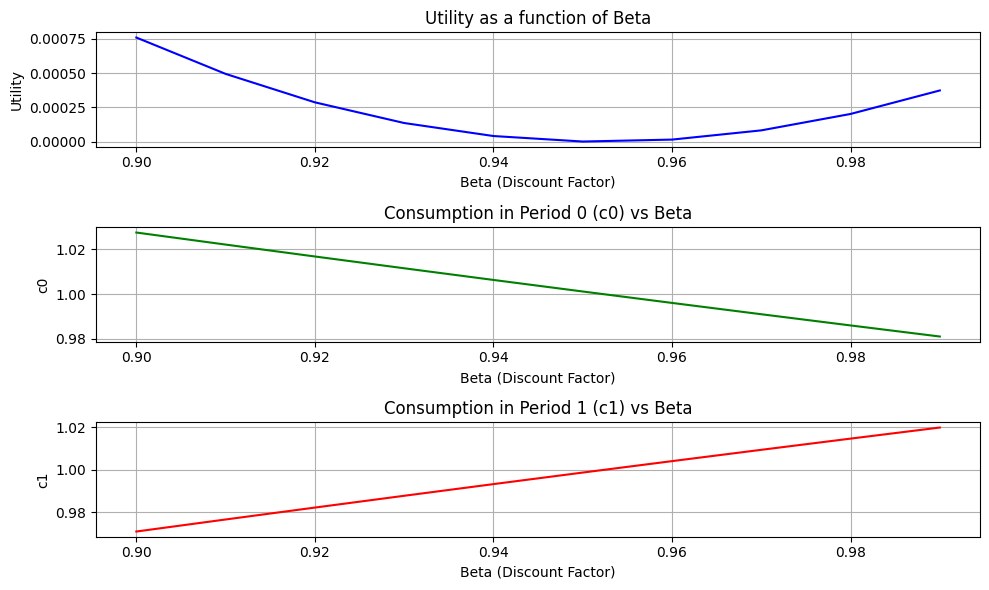

In [2]:
# Parameters
y0 = 1  # Income in the first period
y1 = 1  # Income in the second period
r = 0.05  # Interest rate
PV = y0 + y1 / (1 + r)  # Present value of lifetime income
beta_values = np.arange(0.9, 0.991, 0.01)  # Beta values from 0.9 to 0.99

# Initialize an empty list to store results
results_list = []

# Loop through beta values and calculate c0, c1, a, and Utility
for beta in beta_values:
    # Optimal consumption and saving
    c0 = PV / (1 + beta)
    c1 = beta * (1 + r) * c0
    a = y0 - c0
    utility = np.log(c0) + beta * np.log(c1)

    # Append results as a dictionary to the list
    results_list.append({"Beta": beta, "c0": c0, "c1": c1, "a": a, "Utility": utility})

# Convert the list of dictionaries into a DataFrame
results = pd.DataFrame(results_list)

# Display the results
print(results)

import numpy as np
import matplotlib.pyplot as plt

# Define the utility maximization function
def SolveUtilityMaximizationProblem(y_0, y_1, beta, r):
    # Present Value of lifetime income
    PV = y_0 + y_1 / (1 + r)

    # Calculate c0 (consumption in the first period)
    c0 = PV / (1 + beta)

    # Calculate c1 (consumption in the second period)
    c1 = beta * (1 + r) * c0

    # Calculate utility (U)
    utility = np.log(c0) + beta * np.log(c1)

    return c0, c1, utility

# Parameters
y_0 = 1  # Income in the first period
y_1 = 1  # Income in the second period
r = 0.05  # Interest rate
beta_values = np.arange(0.9, 1.0, 0.01)  # Discount factor (beta values from 0.9 to 0.99)

# Initialize lists to store results
c0_values = []
c1_values = []
utility_values = []

# Loop through beta values and calculate corresponding c0, c1, and utility
for beta in beta_values:
    c0, c1, utility = SolveUtilityMaximizationProblem(y_0, y_1, beta, r)

    # Append the results
    c0_values.append(c0)
    c1_values.append(c1)
    utility_values.append(utility)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot Utility vs Beta
plt.subplot(3, 1, 1)
plt.plot(beta_values, utility_values, label="Utility", color="b")
plt.xlabel("Beta (Discount Factor)")
plt.ylabel("Utility")
plt.title("Utility as a function of Beta")
plt.grid(True)

# Plot c0 vs Beta
plt.subplot(3, 1, 2)
plt.plot(beta_values, c0_values, label="c0 (Consumption in Period 0)", color="g")
plt.xlabel("Beta (Discount Factor)")
plt.ylabel("c0")
plt.title("Consumption in Period 0 (c0) vs Beta")
plt.grid(True)

# Plot c1 vs Beta
plt.subplot(3, 1, 3)
plt.plot(beta_values, c1_values, label="c1 (Consumption in Period 1)", color="r")
plt.xlabel("Beta (Discount Factor)")
plt.ylabel("c1")
plt.title("Consumption in Period 1 (c1) vs Beta")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


As β increases:

The consumer saves more and consumes less in the present.
The consumption in the future increases.
Utility increases as the consumer becomes more future-oriented.

Based on the table we can see the trade-off between c0 & c1. The discount factor changes. When β is low, the consumer is more willing to consume today, but as β increases, they choose to save more and consume in the future.



# Homework B

## Question 1

The following tax rates and government spending are zero in the two countries:
\begin{align}
\tau, \tau^{c}, \tau^{f}, \tau^{w}, g
\end{align}

The capital tax rate and government transfers are zero in the first but positive in the second country:
\begin{align}
\tau^{a}_{1}=v_{1}=0\\
\tau^{a}_{2}=0.2,v_{2}>0
\end{align}

What is the impact of the second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

In [3]:
# Define functions
def SteadyState_Fiscal(params, fiscal):
    α = params['α']
    δ = params['δ']
    β = params['β']
    ρ = 1 / β - 1

    tau_a = fiscal['tau_a']
    tau_f = fiscal['tau_f']
    g = 0
    v = fiscal.get('v')

    # Steady-state capital
    k_star = (α / ((ρ / ((1 - tau_a) * (1 - tau_f))) + δ))**(1 / (1 - α))
    # Steady-state consumption
    c_star = k_star**α - δ * k_star - g

    return k_star, c_star

def ResourceConstraint_Fiscal(k, c, params, fiscal):
    α = params['α']
    δ = params['δ']
    g = 0
    v = fiscal.get('v')

    # Resource constraint: output = consumption + depreciation + transfers
    return k**α + (1 - δ) * k - c

def EulerEquation_Fiscal(k, c, params, fiscal):
    α = params['α']
    β = params['β']
    σ = params['σ']
    δ = params['δ']
    tau_a = fiscal['tau_a']
    tau_f = fiscal['tau_f']
    g = 0

    k_next = ResourceConstraint_Fiscal(k, c, params, fiscal)

    if k_next > 0:
        r_next = (1 - tau_f) * (α * k_next**(α - 1) - δ)
        c_next = (β * (1 + (1 - tau_a) * r_next))**(1 / σ) * c
        return c_next
    else:
        return 0

def Constant_k_Fiscal(k, params, fiscal):
    α = params['α']
    δ = params['δ']
    g = 0
    v = fiscal.get('v')

    # Capital dynamics: change in k = 0
    return k**α - δ * k

def Path_Fiscal(c_0, k_0, params, fiscal, T=100):
    T += 1
    k_t = np.zeros(T)
    c_t = np.zeros(T)

    k_t[0] = k_0
    c_t[0] = c_0

    for t in range(T - 1):
        k_t[t + 1] = ResourceConstraint_Fiscal(k_t[t], c_t[t], params, fiscal)
        if k_t[t + 1] > 0:
            c_t[t + 1] = EulerEquation_Fiscal(k_t[t], c_t[t], params, fiscal)
        else:
            k_t[t + 1] = 0
            c_t[t + 1] = 0

    return k_t, c_t

def Path_crit_Fiscal(c_0, k_0, params, fiscal, T=100):
    k_t, c_t = Path_Fiscal(c_0, k_0, params, fiscal, T)
    k_star, c_star = SteadyState_Fiscal(params, fiscal)

    ss_diff = np.sqrt((k_t - k_star)**2 + (c_t - c_star)**2)
    return np.min(ss_diff) + ss_diff[-1]


In [4]:
# Adding Parameters values
params = {'α': 0.33, 'δ': 0.1, 'σ': 2, 'β': 0.96}

# Fiscal Parameters for Country 1: no taxes, no transfers, no government spending
fiscal_1 = {'g': 0, 'tau_a': 0, 'tau_f': 0, 'v': 0}

# Fiscal Parameters for Country 2: capital tax and transfers
fiscal_2 = {'g': 0, 'tau_a': 0.2, 'tau_f': 0, 'v': 0.2}

# Steady States
k_star_1, c_star_1 = SteadyState_Fiscal(params, fiscal_1)
k_star_2, c_star_2 = SteadyState_Fiscal(params, fiscal_2)

print(f"Country 1 Steady-State:\n  Capital: {k_star_1:.4f}, Consumption: {c_star_1:.4f}")
print(f"Country 2 Steady-State:\n  Capital: {k_star_2:.4f}, Consumption: {c_star_2:.4f}")

Country 1 Steady-State:
  Capital: 3.5329, Consumption: 1.1634
Country 2 Steady-State:
  Capital: 3.1779, Consumption: 1.1468


In [5]:
# Initial capital guess
k_0_1 = k_star_1 / 20

# Solve for initial consumption
result_1 = minimize(Path_crit_Fiscal, 0.34, args=(k_0_1, params, fiscal_1, 100), method='Nelder-Mead')
c_0_1 = result_1.x[0]

#2nd country
k_0_2 = k_star_1 / 20
result_2 = minimize(Path_crit_Fiscal, 0.34, args=(k_0_2, params, fiscal_2, 100), method='Nelder-Mead')
c_0_2 = result_2.x[0]

print(f"Country 1 Initial Consumption: {c_0_1:.4f}")
print(f"Country 2 Initial Consumption: {c_0_2:.4f}")

Country 1 Initial Consumption: 0.3874
Country 2 Initial Consumption: 0.4131


<ipython-input-3-71b93003d425>:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c_t[0] = c_0


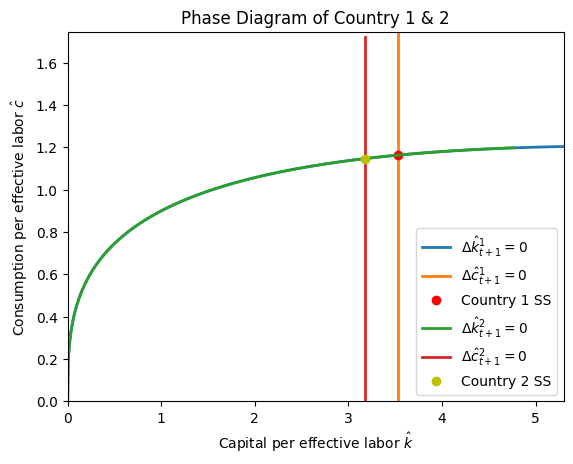

In [6]:
# Phase Diagram
k_t_1, c_t_1 = Path_Fiscal(c_0_1, k_0_1, params, fiscal_1, 50)
k_t_2, c_t_2 = Path_Fiscal(c_0_2, k_0_2, params, fiscal_2, 50)

kk_1 = np.linspace(0, 1.5 * k_star_1, 1000)
cc_1 = np.linspace(0, 1.5 * c_star_1, 1000)

kk_2 = np.linspace(0, 1.5 * k_star_2, 1000)
cc_2 = np.linspace(0, 1.5 * c_star_2, 1000)


# Plotting for Country 1
plt.plot(kk_1, Constant_k_Fiscal(kk_1, params, fiscal_1), lw=2, label='$\\Delta \\hat{k}^{1}_{t+1}=0$')
plt.plot(np.full_like(kk_1, k_star_1), cc_1, lw=2, label='$\\Delta \\hat{c}^{1}_{t+1}=0$')
plt.plot(k_star_1, c_star_1, 'ro', label='Country 1 SS')

# Plotting for Country 2
plt.plot(kk_2, Constant_k_Fiscal(kk_2, params, fiscal_2), lw=2, label='$\\Delta \\hat{k}^{2}_{t+1}=0$')
plt.plot(np.full_like(kk_2, k_star_2), cc_2, lw=2, label='$\\Delta \\hat{c}^{2}_{t+1}=0$')
plt.plot(k_star_2, c_star_2, 'yo', label='Country 2 SS')

plt.xlim(0, 1.5 * max(k_star_1, k_star_2))
plt.ylim(0, 1.5 * max(c_star_1, c_star_2))

plt.title('Phase Diagram of Country 1 & 2')
plt.xlabel('Capital per effective labor $\\hat{k}$')
plt.ylabel('Consumption per effective labor $\\hat{c}$')
plt.legend(loc='lower right')
plt.show()

As can be observed from the Plot, the Capital per effective labor and consumption per effective labor in steady state are higher than Country 2. (marked by the red point and vertical orange line)

And in country 2, we can see the capital per effective labor is lower than in Country 1.
Consumption per effective labor is slightly lower, as indicated by the green point and vertical red line.


The positive capital tax rate discourages savings and investment.
As a result, the capital accumulation is reduced, leading to a lower steady-state level of capital per effective labor compared to Country 1. We can interpret that by looking into the equation for capital at steady-state:
\begin{align}
k^{*} & = \left(\frac{\alpha}{\frac{\rho}{(1-\tau^{a})\left(1-\tau^{f}\right)}+\delta}\right)^{\frac{1}{1-\alpha}}\\
\end{align}

While government transfers boost disposable income and can increase consumption, the capital tax reduces the after-tax return on savings.
This reduces the overall productive capacity of the economy, leading to slightly lower consumption per effective labor in the long run.

### Question 2

The following tax rates and government transfers are zero in the two countries:
\begin{align}
\tau, \tau^{c}, \tau^{a}, \tau^{w}, v
\end{align}

The firm tax rate and government spending (fraction of output) are zero in the first but positive in the second country:
\begin{align}
\tau^{f}_{1}=g_{1}=G_{1}/Y_{1}=0\\
\tau^{f}_{2}=0.2,g_{2}=G_{2}/Y_{2}=0.2
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.


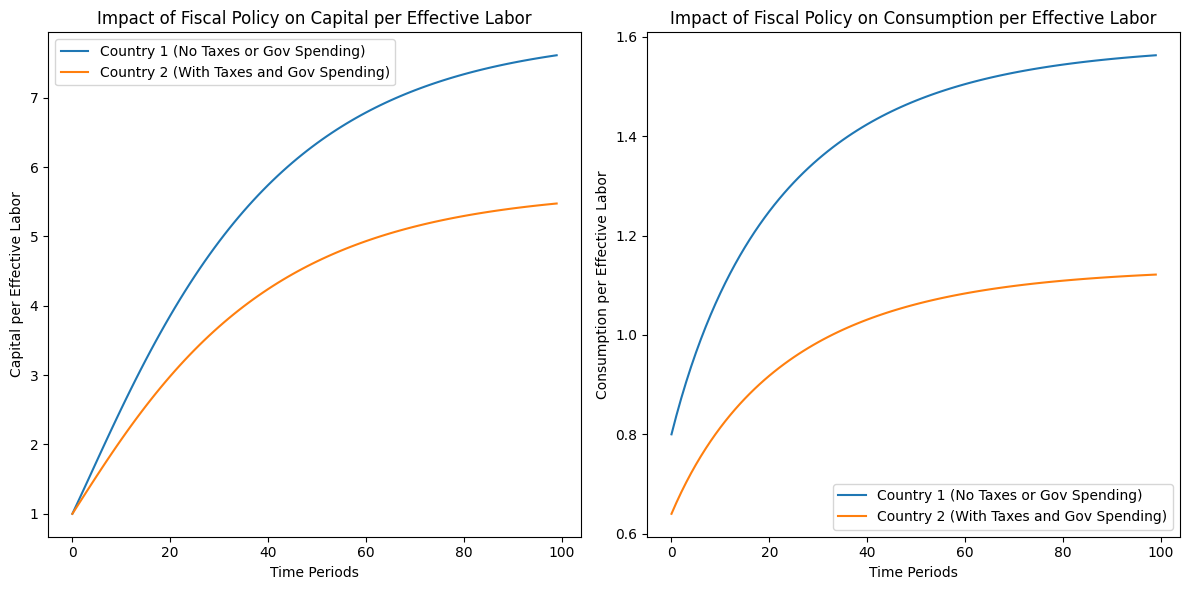

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.33   # Capital share in output
beta = 0.67    # Labor share in output
delta = 0.05   # Depreciation rate of capital
savings_rate = 0.2  # Savings rate (fraction of output saved for investment)
time_periods = 100  # Number of periods to simulate

# Country 1 (No Taxes, No Government Spending)
tau_f_1 = 0   # Firm tax rate in country 1
g_1 = 0       # Government spending fraction in country 1

# Country 2 (With Taxes, Government Spending)
tau_f_2 = 0.2 # Firm tax rate in country 2
g_2 = 0.2     # Government spending fraction in country 2

# Initial conditions
K_1 = 1       # Initial capital per effective labor for Country 1
K_2 = 1       # Initial capital per effective labor for Country 2
A = 1         # Technology factor (assume equal for both countries)
L = 1         # Labor per effective labor (assume equal for both countries)

# Lists to store results
capital_1 = [K_1]
capital_2 = [K_2]
consumption_1 = [(1 - savings_rate) * A * K_1**alpha * L**beta]  # Initial consumption for Country 1
consumption_2 = [(1 - savings_rate) * (1 - tau_f_2) * A * K_2**alpha * L**beta]  # Initial consumption for Country 2

# Simulation loop
for t in range(1, time_periods):
    # Country 1: Capital and consumption accumulation (no taxes or gov spending)
    K_1_next = K_1 * (1 - delta) + savings_rate * (A * K_1**alpha * L**beta)
    Y_1 = A * K_1_next**alpha * L**beta
    C_1 = (1 - savings_rate) * Y_1  # Consumption per effective labor for Country 1

    # Country 2: Capital and consumption accumulation (with taxes and gov spending)
    K_2_next = K_2 * (1 - delta) + savings_rate * (1 - tau_f_2) * (A * K_2**alpha * L**beta)
    Y_2 = (1 - tau_f_2) * A * K_2_next**alpha * L**beta
    C_2 = (1 - savings_rate) * Y_2  # Consumption per effective labor for Country 2

    # Append results for plotting
    capital_1.append(K_1_next)
    capital_2.append(K_2_next)
    consumption_1.append(C_1)
    consumption_2.append(C_2)

    # Update capital for next period
    K_1 = K_1_next
    K_2 = K_2_next

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Capital per Effective Labor
plt.subplot(1, 2, 1)
plt.plot(capital_1, label="Country 1 (No Taxes or Gov Spending)")
plt.plot(capital_2, label="Country 2 (With Taxes and Gov Spending)")
plt.xlabel('Time Periods')
plt.ylabel('Capital per Effective Labor')
plt.title('Impact of Fiscal Policy on Capital per Effective Labor')
plt.legend()

# Plot Consumption per Effective Labor
plt.subplot(1, 2, 2)
plt.plot(consumption_1, label="Country 1 (No Taxes or Gov Spending)")
plt.plot(consumption_2, label="Country 2 (With Taxes and Gov Spending)")
plt.xlabel('Time Periods')
plt.ylabel('Consumption per Effective Labor')
plt.title('Impact of Fiscal Policy on Consumption per Effective Labor')
plt.legend()

# Show both plots
plt.tight_layout()
plt.show()

- In Country 1, both the firm tax rate and government spending fraction are zero.
- In Country 2, the firm tax rate is 0.2 and the government spending fraction is 0.2.

The problem asks for the impact of Country 2’s fiscal policy on the levels of capital and consumption per effective labor relative to Country 1 along the balanced growth path.

**Intuition and Expected Impact:**

- In Country 1, with zero taxes and no government spending, the capital accumulation process can proceed without distortion, meaning the output per effective labor is maximized.

- In Country 2, the firm tax rate of 0.2 (meaning the government takes 20% of the firm's output) and government spending of 0.2 reduce the amount of capital that is available for private consumption and investment. Taxes reduce the returns to capital, which would typically lead to lower capital accumulation in the long run. Also, government spending consumes a fraction of output that could otherwise have been used for private consumption or investment.

**Effect on Capital and Consumption per Effective Labor:**

Capital per Effective Labor:

With higher taxes and government spending in Country 2, the level of capital per effective labor will likely be lower compared to Country 1 because a portion of output is being taxed and spent by the government, reducing private investment. The capital accumulation process in Country 2 will be less efficient than in Country 1 due to the diversion of output.

Consumption per Effective Labor:

As capital per effective labor is lower in Country 2, output and consumption per effective labor will also be lower relative to Country 1. However, government spending might partially offset this by directly providing transfers or public goods, but the overall impact on private consumption is likely negative.


**Conclusion:**

This simplified model indicates that Country 2, with its fiscal policy (taxes and government spending), will have slower capital accumulation and lower levels of capital per effective labor compared to Country 1, resulting in lower output and consumption per effective labor in the long run.


## Question 3

The following tax rates and government transfers are zero in the two countries:
\begin{align}
\tau, \tau^{a}, \tau^{f}, \tau^{w}, v
\end{align}

The consumption tax rate and government spending (fraction of output) are zero in the first but positive in the second country:
\begin{align}
\tau^{c}_{1}=g_{1}=G_{1}/Y_{1}=0\\
\tau^{c}_{2}=0.2,g_{2}=G_{2}/Y_{2}=0.2
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

Country 1 (No Fiscal Policy):
  Steady-state capital per effective labor (k*): 3.2930
  Steady-state consumption per effective labor (c*): 1.3172
  Steady-state government spending (g*): 0.0000
  Utility from consumption: -0.7592

Country 2 (With Fiscal Policy):
  Steady-state capital per effective labor (k*): 0.4116
  Steady-state consumption per effective labor (c*): 0.5763
  Steady-state government spending (g*): 0.1492
  Utility from consumption: -1.7352

Impact of Fiscal Policy:
  Change in capital per effective labor: -2.8814
  Change in consumption per effective labor: -0.7409
  Change in utility: -0.9761


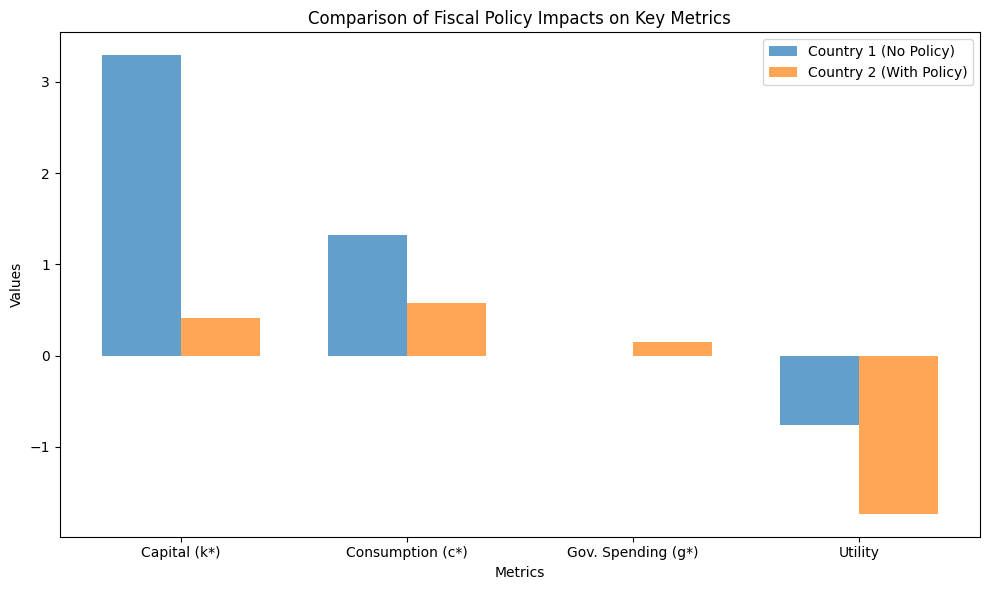

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.33  # Capital share
delta = 0.05  # Depreciation rate
n = 0.02  # Population growth rate
theta = 0.02  # Technology growth rate
s = 0.2  # Private savings rate
beta = 0.98  # Discount factor
rho = 2  # Elasticity of intertemporal substitution

# Fiscal policies
g1, tau_c1 = 0, 0  # Country 1: No fiscal policy
g2, tau_c2 = 0.2, 0.2  # Country 2: Government spending and consumption tax

# Function to calculate steady-state capital and consumption per effective labor
def calculate_steady_state(g, tau_c, alpha, delta, n, theta, s, rho):
    # Effective savings rate considering fiscal policies
    s_effective = s * (1 - tau_c)

    # Steady-state capital per effective labor
    k_star = (s_effective / (delta + g + n + theta)) ** (1 / (1 - alpha))

    # Output per effective labor
    y_star = k_star ** alpha

    # Government spending per effective labor
    g_star = g * y_star

    # Steady-state consumption per effective labor
    c_star = y_star - delta * k_star - g_star

    # Utility-based adjustment to consumption
    utility_c = (c_star ** (1 - rho)) / (1 - rho) if rho != 1 else np.log(c_star)
    return k_star, c_star, g_star, utility_c

# Calculate for both countries
k1, c1, g1_star, u1 = calculate_steady_state(g1, tau_c1, alpha, delta, n, theta, s, rho)
k2, c2, g2_star, u2 = calculate_steady_state(g2, tau_c2, alpha, delta, n, theta, s, rho)

# Comparison metrics
delta_k = k2 - k1
delta_c = c2 - c1
delta_u = u2 - u1

# Print results
print("Country 1 (No Fiscal Policy):")
print(f"  Steady-state capital per effective labor (k*): {k1:.4f}")
print(f"  Steady-state consumption per effective labor (c*): {c1:.4f}")
print(f"  Steady-state government spending (g*): {g1_star:.4f}")
print(f"  Utility from consumption: {u1:.4f}")

print("\nCountry 2 (With Fiscal Policy):")
print(f"  Steady-state capital per effective labor (k*): {k2:.4f}")
print(f"  Steady-state consumption per effective labor (c*): {c2:.4f}")
print(f"  Steady-state government spending (g*): {g2_star:.4f}")
print(f"  Utility from consumption: {u2:.4f}")

print("\nImpact of Fiscal Policy:")
print(f"  Change in capital per effective labor: {delta_k:.4f}")
print(f"  Change in consumption per effective labor: {delta_c:.4f}")
print(f"  Change in utility: {delta_u:.4f}")

# Visualization
labels = ['Capital (k*)', 'Consumption (c*)', 'Gov. Spending (g*)', 'Utility']
values_country1 = [k1, c1, g1_star, u1]
values_country2 = [k2, c2, g2_star, u2]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, values_country1, width, label='Country 1 (No Policy)', alpha=0.7)
ax.bar(x + width/2, values_country2, width, label='Country 2 (With Policy)', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Fiscal Policy Impacts on Key Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


## Interpretation

### Steady-State Capital (k):*

In Country 2, the government spending and consumption tax reduce the effective savings rate, leading to a lower steady-state capital stock compared to Country 1. This is because part of the output is directed towards government spending rather than private savings.

### Steady-State Consumption (c):*

Consumption per effective labor in Country 2 is lower than in Country 1 due to both the consumption tax (reducing disposable income) and reduced capital accumulation (resulting in lower output).

### Government Spending (g):*

In Country 1, government spending is zero. In Country 2, it constitutes a fixed fraction of output, effectively reallocating resources from private consumption to public spending.

### Utility (u):

Utility is derived from consumption using a CRRA utility function. In Country 2, utility is lower due to reduced consumption, despite government spending potentially providing indirect utility (not modeled here).

### Policy Trade-Offs:

The fiscal policy in Country 2 leads to a redistribution of resources but reduces both capital and consumption levels in the long run. The trade-off involves potential benefits of government spending (e.g., public goods, infrastructure) versus the cost of reduced private welfare.


## Country 1 (No Fiscal Policy):

### Capital per Effective Labor

(k = 3.2930):*</br>
Without fiscal policy, the savings rate directly translates to a higher accumulation of capital. The absence of government spending or taxation allows private savings to fully contribute to capital formation.

### Consumption per Effective Labor

(c = 1.3172):*</br>
Households retain all their income for consumption after savings, maximizing private welfare. This leads to higher consumption levels compared to Country 2.

### Government Spending

(g = 0.0000):*</br>
Since there is no government spending, all output is divided between private consumption and investment in capital.

### Utility from Consumption

(u = -0.7592):</br>
The CRRA utility function (with elasticity of intertemporal substitution
𝜌 = 2) reflects a relatively higher utility because consumption is higher, and there are no taxes or government expenditures diverting resources.

## Country 2 (With Fiscal Policy):

### Capital per Effective Labor

(k = 0.4116):*</br>
The introduction of a 20% consumption tax (𝜏
𝑐 = 0.2) and government spending (
𝑔2 = 0.2) significantly reduces the effective savings rate. This leads to much lower capital accumulation, as less output is reinvested in the economy.

### Consumption per Effective Labor

(c = 0.5763):*</br>
The combination of a lower capital stock and a consumption tax reduces disposable income and, subsequently, consumption levels. Households have fewer resources available for private consumption after taxation.

### Government Spending

(g = 0.1492):*</br>
Government spending diverts 20% of the output to public expenditures. While this may provide public goods, its direct effect is to reduce the resources available for private consumption and investment.

### Utility from Consumption

(u = -1.7352):</br>
Utility decreases significantly due to lower consumption levels. The negative value indicates that the reduced consumption imposes a considerable welfare loss, as private consumption drives utility in this model.

## Impact of Fiscal Policy (Country 2 vs. Country 1):

### Change in Capital per Effective Labor

(Δ𝑘 = Δk=−2.8814):</br>

Fiscal policy reduces the steady-state capital stock drastically. This is a direct result of the lower effective savings rate caused by the consumption tax and the reallocation of resources to government spending.

### Change in Consumption per Effective Labor

(Δc=−0.7409):</br>

Consumption falls significantly due to reduced disposable income (from taxation) and lower output (from reduced capital accumulation). This highlights the cost of government intervention in terms of private welfare.
### Change in Utility
(Δu=−0.9761):</br>

The large drop in utility reflects the compounding negative effects of reduced consumption and lower capital accumulation. Households face a double burden: higher taxes and reduced resources for private consumption.

## Overall Insights:
### Efficiency vs. Redistribution:

Country 1 maximizes private welfare by allowing households to allocate resources freely. However, Country 2 sacrifices efficiency (lower capital and consumption) to fund public spending. This redistribution could provide benefits not captured in the model, such as public goods or infrastructure.

### Trade-offs in Fiscal Policy:

While fiscal policy in Country 2 funds government spending, it imposes significant costs on private consumption and capital accumulation. These costs outweigh the direct utility benefits from private consumption under the assumptions of this model.

### Long-Term Consequences:

Fiscal policy that reduces savings and capital formation can have long-term negative effects on economic growth. Lower capital levels reduce output and, subsequently, the resources available for both private and public use.

### Policy Implications:

Policymakers should carefully evaluate the balance between taxation, government spending, and its impact on private welfare. High taxes and spending can lead to substantial welfare losses if the benefits of public spending do not offset the costs.
Let me know if you’d like to explore further adjustments or additional scenarios!